<a href="https://colab.research.google.com/github/rohitvmeshram/Heart-Attack-Prediction/blob/main/Data_Science_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import module__

In [ ]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter("ignore")

##data understanding__

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##data preparation__

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

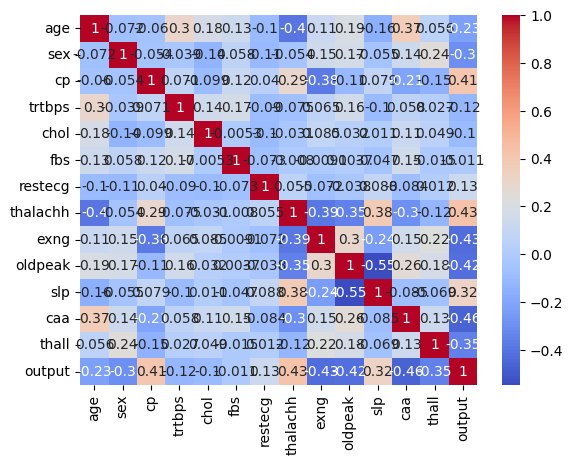

In [ ]:



correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

###  Handling missing values  abd Handling outliers

In [ ]:
# Handling missing values
df.dropna(inplace=True)  # Alternatively, use imputation methods

# Handling outliers
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]  # Remove outliers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trtbps    287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalachh  287 non-null    int64  
 8   exng      287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slp       287 non-null    int64  
 11  caa       287 non-null    int64  
 12  thall     287 non-null    int64  
 13  output    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,287.0,54.334495,9.093125,29.0,47.0,55.0,61.0,77.0
sex,287.0,0.689895,0.463344,0.0,0.0,1.0,1.0,1.0
cp,287.0,0.972125,1.037373,0.0,0.0,1.0,2.0,3.0
trtbps,287.0,131.024390,16.991856,94.0,120.0,130.0,140.0,180.0
chol,287.0,244.501742,45.920719,126.0,211.0,241.0,274.0,394.0
fbs,287.0,0.142857,0.350538,0.0,0.0,0.0,0.0,1.0
restecg,287.0,0.533101,0.527017,0.0,0.0,1.0,1.0,2.0
thalachh,287.0,149.804878,22.550570,88.0,133.5,153.0,166.0,202.0
exng,287.0,0.327526,0.470131,0.0,0.0,0.0,1.0,1.0
oldpeak,287.0,1.004878,1.080684,0.0,0.0,0.8,1.6,4.4


In [ ]:
count = ['sex', 'cp', 'fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']

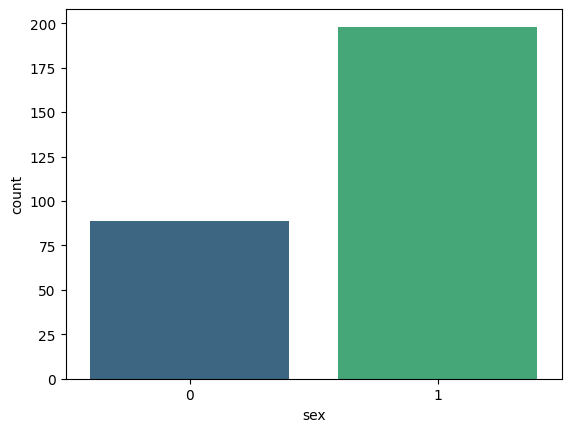

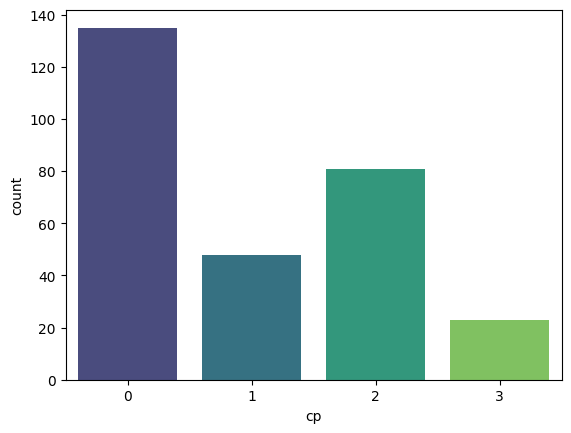

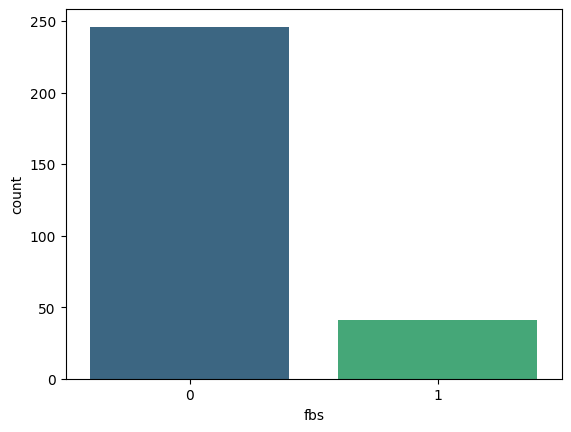

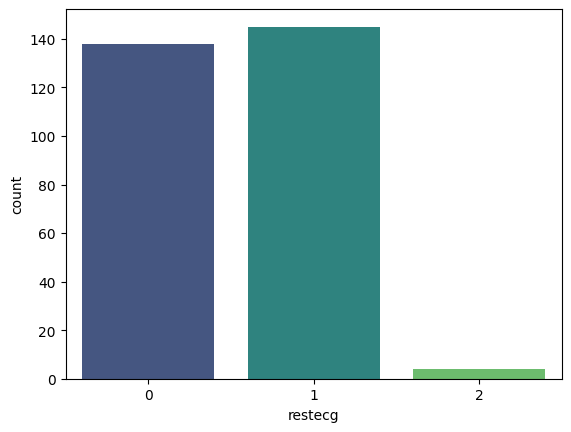

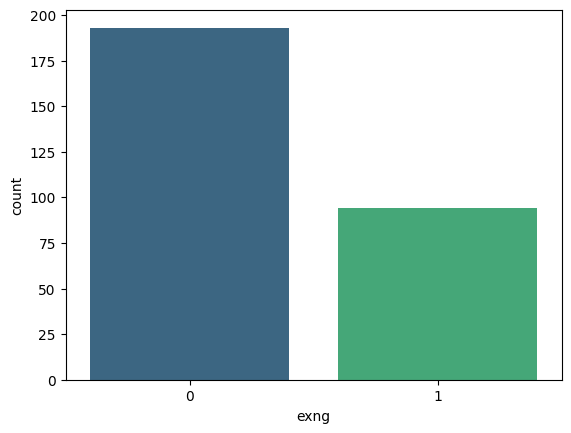

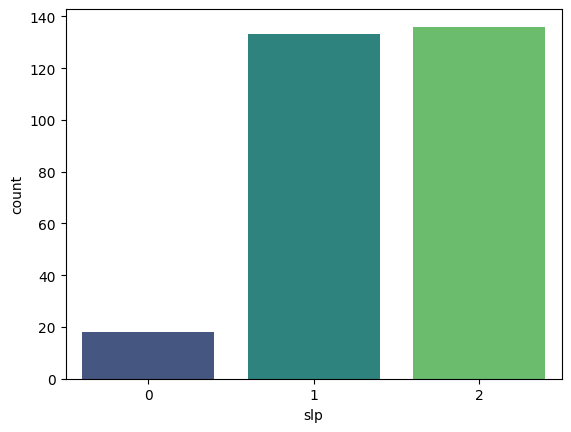

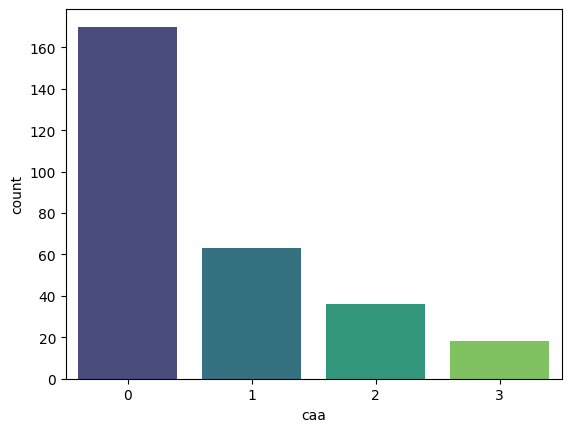

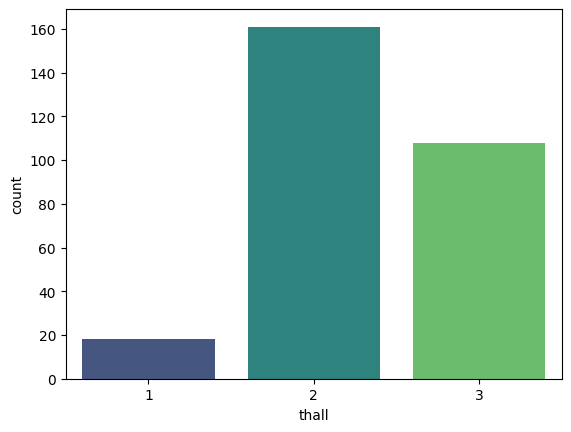

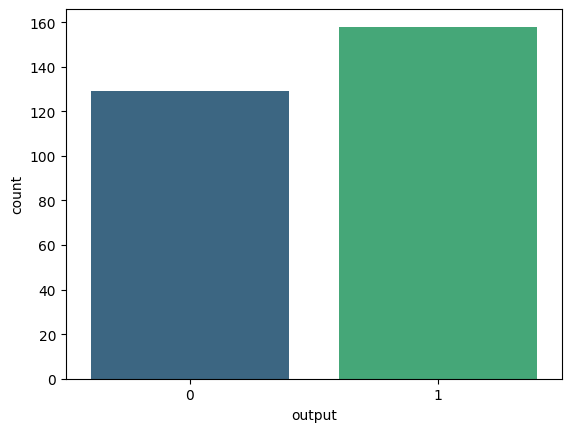

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in count:
    sns.countplot(x=df[i], palette = 'viridis')
    plt.show()

##checking for multicollinearity__ / featureselection

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trtbps,62.815096
7,thalachh,48.008305
0,age,42.873166
4,chol,30.817841
12,thall,18.922004
10,slp,10.205474
13,output,4.617579
1,sex,3.836374
9,oldpeak,3.117601
2,cp,2.583002


In [ ]:
# drop column  (vif > 12)
df.drop(columns = ['trtbps'], inplace = True)
df.drop(columns = ['thalachh'], inplace = True)
df.drop(columns = ['age'], inplace = True)
df.drop(columns = ['chol'], inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 12

,feature,VIF
8,thall,11.133471
6,slp,7.892021
9,output,3.715206
0,sex,3.641110
5,oldpeak,2.726185
1,cp,2.486734
3,restecg,2.088072
7,caa,1.985237
4,exng,1.969895
2,fbs,1.236076


##check for imbalance in data

In [ ]:
df['output'].value_counts()

1    158
0    129
Name: output, dtype: int64

##model

In [ ]:
X = df.drop(columns=['output'])
y = df['output']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression

In [ ]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=42)
model=model.fit(X_train, y_train)
#Making prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
import sklearn.metrics
r_lgt= sklearn.metrics.recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= sklearn.metrics.precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= sklearn.metrics.f1_score(y_test, pred)
print("f1_score :", f1_lgt)

A_lgt= sklearn.metrics.accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = sklearn.metrics.roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  0.9310344827586207
precision_score : 0.8181818181818182
f1_score : 0.8709677419354839
accuracy_score : 0.8620689655172413
ROC_AUC Score: 0.8690909090909091


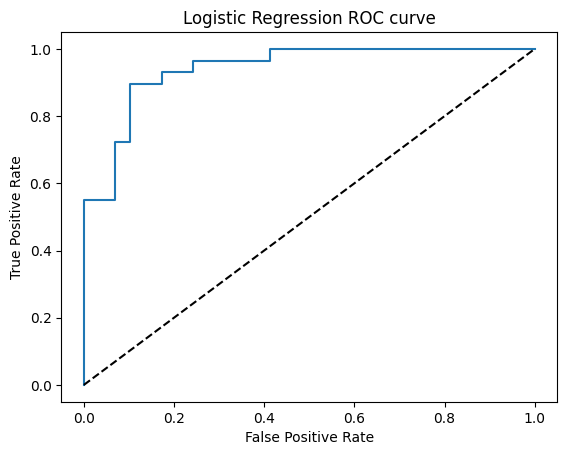

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[23  6]
 [ 2 27]]


<Axes: >

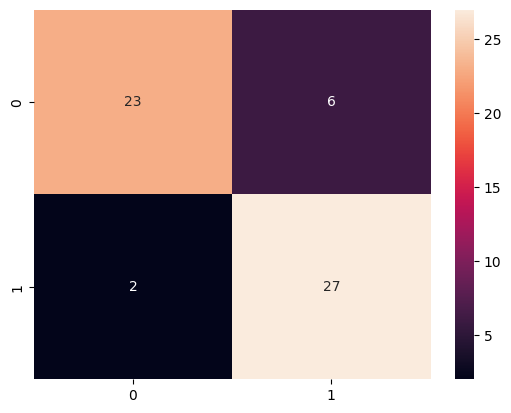

In [ ]:
import sklearn.metrics
matrix= sklearn.metrics.confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_train, y_train)
#Making prediction
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
from sklearn.metrics import recall_score
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

recall_score :  0.8620689655172413
precision_score : 0.8620689655172413
f1_score : 0.8620689655172413
accuracy_score : 0.8620689655172413
ROC_AUC Score: 0.8620689655172413


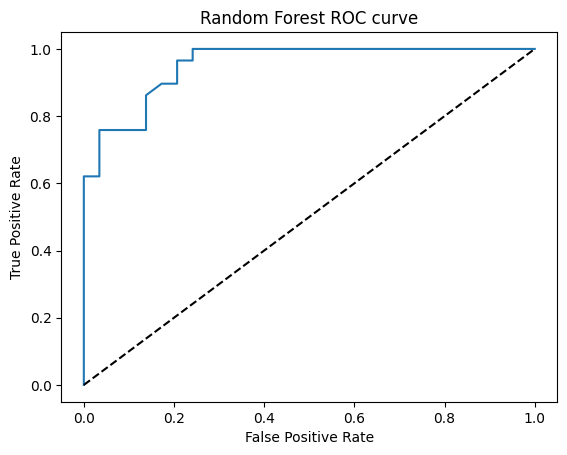

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[25  4]
 [ 4 25]]


<Axes: >

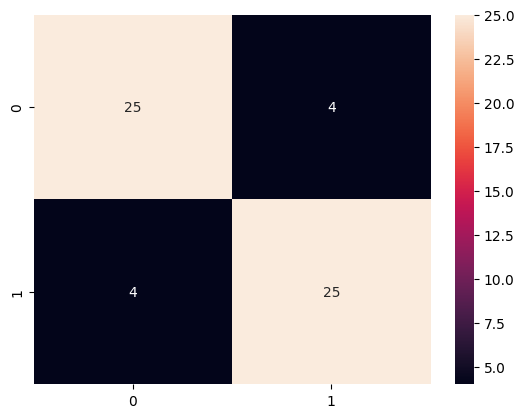

In [ ]:
matrix= confusion_matrix(y_test,rf_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

##XGBoost

In [ ]:
XG_model= XGBClassifier()
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)

recall_score :  0.8275862068965517
precision_score : 0.8571428571428571
f1_score : 0.8421052631578947
accuracy_score : 0.8448275862068966
ROC_AUC Score: 0.8452380952380952


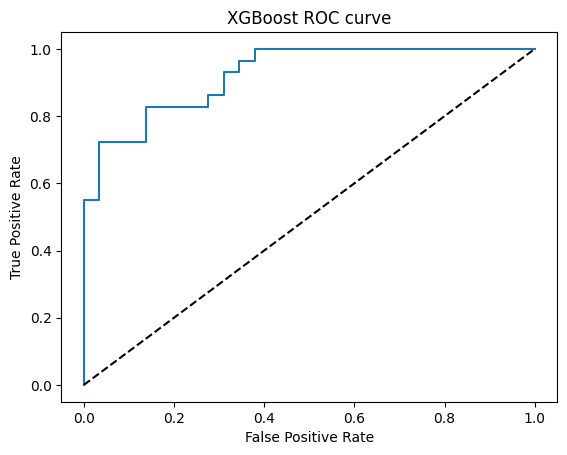

In [ ]:
fpr, tpr, _ = roc_curve(y_test, XG_prob)

plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[25  4]
 [ 5 24]]


<Axes: >

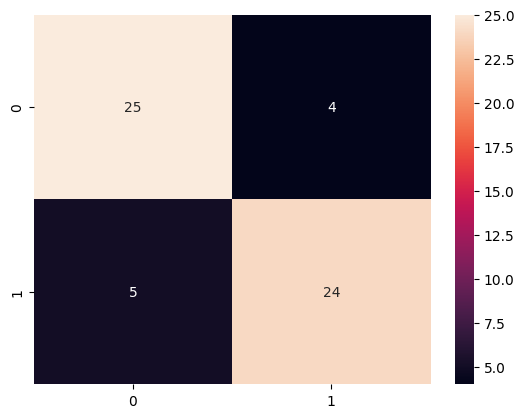

In [ ]:
matrix= confusion_matrix(y_test,XG_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

##Comparing the Model

In [ ]:
com= ['Logistic Regression','Randomforest','XGBClassifier']
data={'Accuracy':[A_lgt,A_rf,A_XG],'Recall':[r_lgt,r_rf, r_XG],'Precision':[p_lgt, p_rf, p_XG], 'f1_score':[f1_lgt, f1_rf, f1_XG],'ROC_AUC':[acu_lgt, acu_rf, acu_XG]}
result=pd.DataFrame(data=data, index=com)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.862069,0.931034,0.818182,0.870968,0.869091
Randomforest,0.862069,0.862069,0.862069,0.862069,0.862069
XGBClassifier,0.844828,0.827586,0.857143,0.842105,0.845238
